In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#read in csv files necessary for analysis 
region1 = pd.read_csv("region1.csv")
region2 = pd.read_csv("region2.csv")

In [5]:
#Creating dataframes to be used
title1 = pd.DataFrame(region1)
title2 = pd.DataFrame(region2)
titles = [title1, title2]
titles_all = pd.concat(titles)

In [6]:
#reading casv file for analysis
title_basics = pd.read_csv('raw_basic1.csv')
title_basics.head()

,titleType,tconst,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,short,tt0000001,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,short,tt0000002,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,short,tt0000003,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,5,"Animation,Comedy,Romance"
3,short,tt0000004,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,short,tt0000005,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [7]:
#merge dataframes to combine data from basics file to bring in genre and other important information
merge_df1 = pd.merge(titles_all, title_basics, how = "left", left_on="titleId", right_on="tconst")
merge_df1.head()

,ordering,titleId,title,region,language,types,attributes,isOriginalTitle,titleType,tconst,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,3,tt0000001,Carmencita,US,\N,imdbDisplay,\N,0,short,tt0000001,Carmencita,Carmencita,0.0,1894,\N,1,"Documentary,Short"
1,6,tt0000002,The Clown and His Dogs,US,\N,\N,literal English title,0,short,tt0000002,Le clown et ses chiens,Le clown et ses chiens,0.0,1892,\N,5,"Animation,Short"
2,3,tt0000005,Blacksmith Scene,US,\N,imdbDisplay,\N,0,short,tt0000005,Blacksmith Scene,Blacksmith Scene,0.0,1893,\N,1,"Comedy,Short"
3,5,tt0000005,Blacksmith Scene #1,US,\N,alternative,\N,0,short,tt0000005,Blacksmith Scene,Blacksmith Scene,0.0,1893,\N,1,"Comedy,Short"
4,7,tt0000005,Blacksmithing,US,\N,\N,informal alternative title,0,short,tt0000005,Blacksmith Scene,Blacksmith Scene,0.0,1893,\N,1,"Comedy,Short"


In [8]:
#pulling in ratings from a different csv provided by IMDb
title_ratings = pd.read_csv('ratings.csv')
title_ratings.head()

,Unnamed: 0,ordering,titleId,title,region,language,types,attributes,isOriginalTitle,tconst,averageRating,numVotes
0,0,3,tt0000001,Carmencita,US,\N,imdbDisplay,\N,0,tt0000001,5.7,2053.0
1,1,6,tt0000002,The Clown and His Dogs,US,\N,\N,literal English title,0,tt0000002,5.7,275.0
2,2,3,tt0000005,Blacksmith Scene,US,\N,imdbDisplay,\N,0,tt0000005,6.2,2775.0
3,3,5,tt0000005,Blacksmith Scene #1,US,\N,alternative,\N,0,tt0000005,6.2,2775.0
4,4,7,tt0000005,Blacksmithing,US,\N,\N,informal alternative title,0,tt0000005,6.2,2775.0


In [9]:
#merging dataframes to contain ratings data
merge_df2 = pd.merge(merge_df1, title_ratings, how = "left", left_on="titleId", right_on="titleId")
merge_df2.head()

,ordering_x,titleId,title_x,region_x,language_x,types_x,attributes_x,isOriginalTitle_x,titleType,tconst_x,...,ordering_y,title_y,region_y,language_y,types_y,attributes_y,isOriginalTitle_y,tconst_y,averageRating,numVotes
0,3,tt0000001,Carmencita,US,\N,imdbDisplay,\N,0,short,tt0000001,...,3,Carmencita,US,\N,imdbDisplay,\N,0,tt0000001,5.7,2053.0
1,6,tt0000002,The Clown and His Dogs,US,\N,\N,literal English title,0,short,tt0000002,...,6,The Clown and His Dogs,US,\N,\N,literal English title,0,tt0000002,5.7,275.0
2,3,tt0000005,Blacksmith Scene,US,\N,imdbDisplay,\N,0,short,tt0000005,...,3,Blacksmith Scene,US,\N,imdbDisplay,\N,0,tt0000005,6.2,2775.0
3,3,tt0000005,Blacksmith Scene,US,\N,imdbDisplay,\N,0,short,tt0000005,...,5,Blacksmith Scene #1,US,\N,alternative,\N,0,tt0000005,6.2,2775.0
4,3,tt0000005,Blacksmith Scene,US,\N,imdbDisplay,\N,0,short,tt0000005,...,7,Blacksmithing,US,\N,\N,informal alternative title,0,tt0000005,6.2,2775.0


In [10]:
#Use Jim's code to narrow down genre categories
merge_df2.loc[merge_df2['genres'].str.startswith('Comedy',na=False),'genres'] = 'Comedy'
merge_df2.loc[merge_df2['genres'].str.startswith('Documentary',na=False),'genres'] = 'Documentary'
merge_df2.loc[merge_df2['genres'].str.startswith('Animation',na=False),'genres'] = 'Animation'
merge_df2.loc[merge_df2['genres'].str.startswith('Short',na=False),'genres'] = 'Short'
merge_df2.loc[merge_df2['genres'].str.startswith('Romance',na=False),'genres'] = 'Romance'
merge_df2.loc[merge_df2['genres'].str.startswith('News',na=False),'genres'] = 'News'
merge_df2.loc[merge_df2['genres'].str.startswith('Drama',na=False),'genres'] = 'Drama'
merge_df2.loc[merge_df2['genres'].str.startswith('Fantasy',na=False),'genres'] = 'Fantasy'
merge_df2.loc[merge_df2['genres'].str.startswith('Horror',na=False),'genres'] = 'Horror'
merge_df2.loc[merge_df2['genres'].str.startswith('Biography',na=False),'genres'] = 'Biography'
merge_df2.loc[merge_df2['genres'].str.startswith('Music',na=False),'genres'] = 'Music'
merge_df2.loc[merge_df2['genres'].str.startswith('Crime',na=False),'genres'] = 'Crime'
merge_df2.loc[merge_df2['genres'].str.startswith('Family',na=False),'genres'] = 'Family'
merge_df2.loc[merge_df2['genres'].str.startswith('Adventure',na=False),'genres'] = 'Adventure'
merge_df2.loc[merge_df2['genres'].str.startswith('Action',na=False),'genres'] = 'Action'
merge_df2.loc[merge_df2['genres'].str.startswith('History',na=False),'genres'] = 'History'
merge_df2.loc[merge_df2['genres'].str.startswith('Mystery',na=False),'genres'] = 'Mystery'
merge_df2.loc[merge_df2['genres'].str.startswith('Musical',na=False),'genres'] = 'Musical'
merge_df2.loc[merge_df2['genres'].str.startswith('War',na=False),'genres'] = 'War'
merge_df2.loc[merge_df2['genres'].str.startswith('Sci-Fi',na=False),'genres'] = 'Sci-Fi'
merge_df2.loc[merge_df2['genres'].str.startswith('Western',na=False),'genres'] = 'Western'
merge_df2.loc[merge_df2['genres'].str.startswith('Thriller',na=False),'genres'] = 'Thriller'
merge_df2.loc[merge_df2['genres'].str.startswith('Sport',na=False),'genres'] = 'Sport'
merge_df2.loc[merge_df2['genres'].str.startswith('Film-Noir',na=False),'genres'] = 'Film-Noir'
merge_df2.loc[merge_df2['genres'].str.startswith('Talk-Show',na=False),'genres'] = 'Talk-Show'
merge_df2.loc[merge_df2['genres'].str.startswith('Game-Show',na=False),'genres'] = 'Game-Show'
merge_df2.loc[merge_df2['genres'].str.startswith('Adult',na=False),'genres'] = 'Adult'
merge_df2.loc[merge_df2['genres'].str.startswith('Reality-TV',na=False),'genres'] = 'Reality-TV'

In [11]:
merge_df2['genres'].value_counts()

genres
Comedy         95699
Drama          77506
Action         46173
Adult          39404
Documentary    31560
Adventure      22666
Crime          19906
Animation      19531
Horror         13629
Short          12494
\N             11710
Western         7236
Biography       6488
Music           6211
Family          3813
Fantasy         2272
Sport           2027
Thriller        1896
News            1741
Mystery         1666
Reality-TV      1500
Romance         1301
Sci-Fi          1087
Game-Show        932
Talk-Show        792
History          470
War              253
Film-Noir        166
Name: count, dtype: int64

In [12]:
list(merge_df2)

['ordering_x',
 'titleId',
 'title_x',
 'region_x',
 'language_x',
 'types_x',
 'attributes_x',
 'isOriginalTitle_x',
 'titleType',
 'tconst_x',
 'primaryTitle',
 'originalTitle',
 'isAdult',
 'startYear',
 'endYear',
 'runtimeMinutes',
 'genres',
 'Unnamed: 0',
 'ordering_y',
 'title_y',
 'region_y',
 'language_y',
 'types_y',
 'attributes_y',
 'isOriginalTitle_y',
 'tconst_y',
 'averageRating',
 'numVotes']

In [13]:
#Bin genres
merge_df2['genres'] = merge_df2['genres'].str.split('|')
exploded_genres = merge_df2.explode('genres')


In [14]:
#Print bins
genre_counts = exploded_genres['genres'].value_counts()
print(genre_counts)

genres
Comedy         95699
Drama          77506
Action         46173
Adult          39404
Documentary    31560
Adventure      22666
Crime          19906
Animation      19531
Horror         13629
Short          12494
\N             11710
Western         7236
Biography       6488
Music           6211
Family          3813
Fantasy         2272
Sport           2027
Thriller        1896
News            1741
Mystery         1666
Reality-TV      1500
Romance         1301
Sci-Fi          1087
Game-Show        932
Talk-Show        792
History          470
War              253
Film-Noir        166
Name: count, dtype: int64


In [15]:
genre_avg_rating = exploded_genres.groupby('genres')['averageRating'].mean()
print(genre_avg_rating)

genres
Action         6.197088
Adult          5.980352
Adventure      6.482503
Animation      6.437401
Biography      6.796002
Comedy         6.090482
Crime          6.283851
Documentary    6.686672
Drama          6.259206
Family         6.888271
Fantasy        5.635018
Film-Noir      6.557831
Game-Show      6.118995
History        6.625722
Horror         4.936948
Music          6.851318
Mystery        6.000721
News           5.456462
Reality-TV     6.342418
Romance        5.918954
Sci-Fi         5.099690
Short          6.256313
Sport          6.291491
Talk-Show      6.098498
Thriller       5.201178
War            6.073953
Western        6.208217
\N             6.392512
Name: averageRating, dtype: float64


In [16]:
genre_avg_rating.sort_values(ascending=False)

genres
Family         6.888271
Music          6.851318
Biography      6.796002
Documentary    6.686672
History        6.625722
Film-Noir      6.557831
Adventure      6.482503
Animation      6.437401
\N             6.392512
Reality-TV     6.342418
Sport          6.291491
Crime          6.283851
Drama          6.259206
Short          6.256313
Western        6.208217
Action         6.197088
Game-Show      6.118995
Talk-Show      6.098498
Comedy         6.090482
War            6.073953
Mystery        6.000721
Adult          5.980352
Romance        5.918954
Fantasy        5.635018
News           5.456462
Thriller       5.201178
Sci-Fi         5.099690
Horror         4.936948
Name: averageRating, dtype: float64

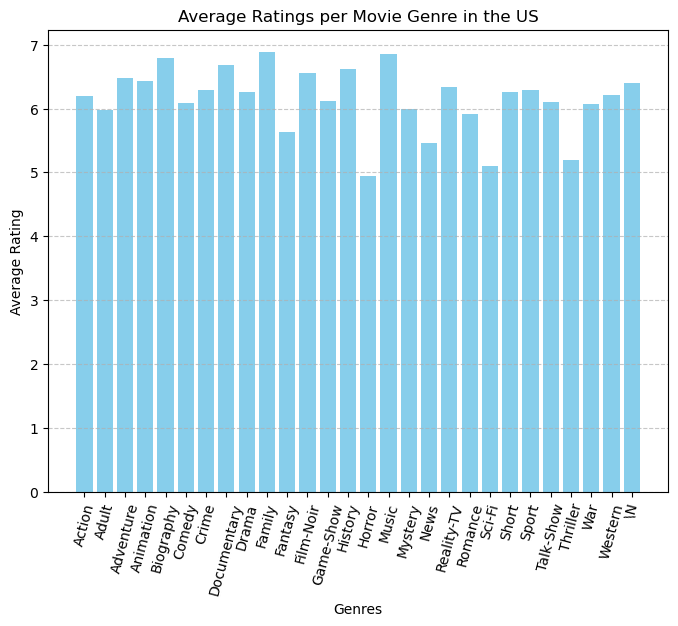

In [17]:


plt.figure(figsize=(8, 6)) 
plt.bar(genre_avg_rating.index, genre_avg_rating.values, color='skyblue')
plt.xlabel('Genres')  # Customize the x-axis label
plt.ylabel('Average Rating')  # Customize the y-axis label
plt.title('Average Ratings per Movie Genre in the US')  # Customize the plot title
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Optional: Add grid lines
plt.xticks(rotation=75)  # Adjust the rotation angle as needed

plt.show()

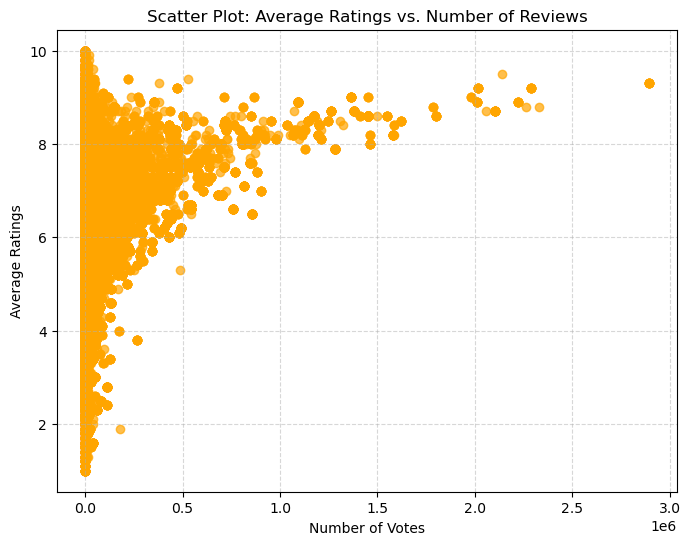

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(merge_df2['numVotes'], merge_df2['averageRating'], color='orange', alpha=0.7)
plt.xlabel('Number of Votes')
plt.ylabel('Average Ratings')
plt.title('Scatter Plot: Average Ratings vs. Number of Reviews')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [19]:
top_10_movies = merge_df2.head(10)  # Select the first 10 rows
print(top_10_movies[['title_y', 'numVotes']])

                  title_y  numVotes
0              Carmencita    2053.0
1  The Clown and His Dogs     275.0
2        Blacksmith Scene    2775.0
3     Blacksmith Scene #1    2775.0
4           Blacksmithing    2775.0
5     Blacksmithing Scene    2775.0
6        Blacksmith Scene    2775.0
7     Blacksmith Scene #1    2775.0
8           Blacksmithing    2775.0
9     Blacksmithing Scene    2775.0


In [20]:
#only show unqiue movie ids as multiple titles maybe associated to one record resulting in multiple rows with different title names
uniquemovies = merge_df2[['titleId','title_y', 'numVotes','averageRating','types_x','genres','runtimeMinutes']].drop_duplicates(subset='titleId')
uniquetitleid = merge_df2[['titleId']].drop_duplicates()
uniquetitleid_2 = uniquetitleid.rename(columns={'titleId': 'UID'})
unique_df = pd.merge(uniquetitleid_2, uniquemovies, how = "inner", left_on="UID", right_on="titleId")
unique_df[['titleId']].drop_duplicates(keep='first', ignore_index=True)
#uniquemovies
unique_df
#uniquetitleid_2

,UID,titleId,title_y,numVotes,averageRating,types_x,genres,runtimeMinutes
0,tt0000001,tt0000001,Carmencita,2053.0,5.7,imdbDisplay,[Documentary],1
1,tt0000002,tt0000002,The Clown and His Dogs,275.0,5.7,\N,[Animation],5
2,tt0000005,tt0000005,Blacksmith Scene,2775.0,6.2,imdbDisplay,[Comedy],1
3,tt0000006,tt0000006,Chinese Opium Den,186.0,5.1,imdbDisplay,[Short],1
4,tt0000007,tt0000007,Corbett and Courtney Before the Kinetograph,860.0,5.4,imdbDisplay,[Short],1
...,...,...,...,...,...,...,...,...
320992,tt11490780,tt11490780,Peck O' Trouble,NaN,NaN,\N,NaN,NaN
320993,tt11490782,tt11490782,Fuss N' Feathers,NaN,NaN,\N,NaN,NaN
320994,tt1149079,tt1149079,Episode 24,NaN,NaN,\N,NaN,NaN
320995,tt11490790,tt11490790,Yuk-Yuk Duck,NaN,NaN,\N,NaN,NaN


In [21]:
unique_df.sort_values(by=['numVotes','averageRating'], ascending=False).head(20)

,UID,titleId,title_y,numVotes,averageRating,types_x,genres,runtimeMinutes
71642,tt0111161,tt0111161,The Shawshank Redemption,2892792.0,9.3,imdbDisplay,[Drama],142
85274,tt0137523,tt0137523,Fight Club,2327608.0,8.8,imdbDisplay,[Drama],139
228582,tt0944947,tt0944947,Game of Thrones,2288600.0,9.2,imdbDisplay,[Action],60
70914,tt0109830,tt0109830,Forrest Gump,2260494.0,8.8,imdbDisplay,[Drama],142
71483,tt0110912,tt0110912,Pulp Fiction,2223356.0,8.9,imdbDisplay,[Crime],154
222284,tt0903747,tt0903747,Breaking Bad,2141383.0,9.5,imdbDisplay,[Crime],45
205809,tt0816692,tt0816692,Interstellar,2104773.0,8.7,imdbDisplay,[Adventure],169
82896,tt0133093,tt0133093,The Matrix,2056103.0,8.7,imdbDisplay,[Action],136
47729,tt0068646,tt0068646,The Godfather,2015640.0,9.2,imdbDisplay,[Crime],175
77059,tt0120737,tt0120737,The Lord of the Rings: The Fellowship of the Ring,2009679.0,8.9,imdbDisplay,[Action],178


In [22]:
unique_df.sort_values(by=['numVotes','averageRating'], ascending=True).head(20)

,UID,titleId,title_y,numVotes,averageRating,types_x,genres,runtimeMinutes
95867,tt0155208,tt0155208,Steel Heel,5.0,2.2,imdbDisplay,[Action],95
256861,tt10369436,tt10369436,True Love,5.0,2.4,imdbDisplay,NaN,NaN
305795,tt11222926,tt11222926,The Honeymoon is Over,5.0,2.4,\N,NaN,NaN
255603,tt10343680,tt10343680,Grenadine,5.0,2.8,imdbDisplay,NaN,NaN
296893,tt11069526,tt11069526,The Secrets We Keep,5.0,2.8,imdbDisplay,NaN,NaN
317919,tt11433000,tt11433000,The Junior Squad Returns,5.0,2.8,\N,NaN,NaN
312113,tt11327980,tt11327980,Balkan Erotic Epic: Group of Men Copulating wi...,5.0,3.4,imdbDisplay,NaN,NaN
303620,tt11186972,tt11186972,Escape from the Bridal Chamber,5.0,3.6,imdbDisplay,NaN,NaN
79225,tt0125234,tt0125234,Indecent Adultery,5.0,4.0,imdbDisplay,[Adult],64
237222,tt10006876,tt10006876,Pornstars Punishment,5.0,4.0,imdbDisplay,[Adult],\N


In [23]:
unique_df.sort_values(by='averageRating', ascending=False).head(20)

,UID,titleId,title_y,numVotes,averageRating,types_x,genres,runtimeMinutes
106573,tt0183268,tt0183268,Innocent Bi-Standers,13.0,10.0,imdbDisplay,[Adult],\N
261009,tt1043737,tt1043737,Night Writer,8.0,10.0,imdbDisplay,NaN,NaN
213262,tt0849445,tt0849445,The Hermit of Manana,5.0,10.0,imdbDisplay,[Short],\N
311435,tt11317856,tt11317856,THE JOKER & HARLEY QUINN,10.0,10.0,imdbDisplay,NaN,NaN
287280,tt10915418,tt10915418,Stenches,8.0,10.0,imdbDisplay,NaN,NaN
157828,tt0323536,tt0323536,The Outlands,10.0,10.0,imdbDisplay,[Short],\N
162886,tt0335505,tt0335505,The Unbroken Circle: A Tribute to Mother Maybe...,13.0,10.0,imdbDisplay,[Music],60
149437,tt0301052,tt0301052,The Fantastic Voyage,16.0,10.0,\N,[\N],90
266326,tt10529764,tt10529764,Baseball Bat: Swing-O-Vision,11.0,10.0,imdbDisplay,NaN,NaN
295275,tt11040972,tt11040972,Leave Only Footprints: A Bigfoot Story,8.0,10.0,imdbDisplay,NaN,NaN


In [24]:
unique_df.sort_values(by='averageRating', ascending=True).head(20)

,UID,titleId,title_y,numVotes,averageRating,types_x,genres,runtimeMinutes
132250,tt0251612,tt0251612,Big News,12.0,1.0,imdbDisplay,[\N],\N
13313,tt0016535,tt0016535,Wild Justice,22.0,1.0,imdbDisplay,[Adventure],60
112044,tt0196943,tt0196943,Shadows,64.0,1.0,imdbDisplay,[Horror],75
234060,tt0980948,tt0980948,Beautiful Child,16.0,1.0,imdbDisplay,[Drama],22
117665,tt0212465,tt0212465,The Reel Deal,19.0,1.0,imdbDisplay,[\N],\N
214844,tt0858466,tt0858466,The Noose,10.0,1.0,imdbDisplay,[Crime],3
14243,tt0017656,tt0017656,Back to Liberty,16.0,1.0,imdbDisplay,[Adventure],\N
103278,tt0175201,tt0175201,Steckler Interviews,21.0,1.0,imdbDisplay,[Documentary],60
152698,tt0309422,tt0309422,The Case He Couldn't Crack,151.0,1.0,imdbDisplay,[Crime],70
168139,tt0349372,tt0349372,Dream Girls: Real Adventures 37,16.0,1.0,\N,[Adult],\N


In [25]:
unique_df.sort_values(by='numVotes', ascending=False).head(20)

,UID,titleId,title_y,numVotes,averageRating,types_x,genres,runtimeMinutes
71642,tt0111161,tt0111161,The Shawshank Redemption,2892792.0,9.3,imdbDisplay,[Drama],142
85274,tt0137523,tt0137523,Fight Club,2327608.0,8.8,imdbDisplay,[Drama],139
228582,tt0944947,tt0944947,Game of Thrones,2288600.0,9.2,imdbDisplay,[Action],60
70914,tt0109830,tt0109830,Forrest Gump,2260494.0,8.8,imdbDisplay,[Drama],142
71483,tt0110912,tt0110912,Pulp Fiction,2223356.0,8.9,imdbDisplay,[Crime],154
222284,tt0903747,tt0903747,Breaking Bad,2141383.0,9.5,imdbDisplay,[Crime],45
205809,tt0816692,tt0816692,Interstellar,2104773.0,8.7,imdbDisplay,[Adventure],169
82896,tt0133093,tt0133093,The Matrix,2056103.0,8.7,imdbDisplay,[Action],136
47729,tt0068646,tt0068646,The Godfather,2015640.0,9.2,imdbDisplay,[Crime],175
77059,tt0120737,tt0120737,The Lord of the Rings: The Fellowship of the Ring,2009679.0,8.9,imdbDisplay,[Action],178


In [26]:
unique_df.sort_values(by='numVotes', ascending=True).head(20)

,UID,titleId,title_y,numVotes,averageRating,types_x,genres,runtimeMinutes
128229,tt0240675,tt0240675,The Left Side of My Brain,5.0,7.2,imdbDisplay,[\N],90
161355,tt0330978,tt0330978,That Brief Moment,5.0,7.8,imdbDisplay,[Short],16
146587,tt0293396,tt0293396,Man of the Day,5.0,5.2,imdbDisplay,[Adventure],99
254352,tt1032161,tt1032161,Chet Lightning: Earth Wizard,5.0,8.6,imdbDisplay,NaN,NaN
289388,tt1094207,tt1094207,Writer's Block,5.0,9.6,imdbDisplay,NaN,NaN
316429,tt11404946,tt11404946,The Controversy,5.0,5.8,imdbDisplay,NaN,NaN
303744,tt11188464,tt11188464,Bitchin' Boot Camp,5.0,8.0,imdbDisplay,NaN,NaN
229547,tt0950688,tt0950688,Doily,5.0,6.0,imdbDisplay,[Drama],9
311281,tt11316692,tt11316692,Rumpleforeskin,5.0,7.0,imdbDisplay,NaN,NaN
302775,tt11171636,tt11171636,American Tourister: Gorilla,5.0,6.6,imdbDisplay,NaN,NaN


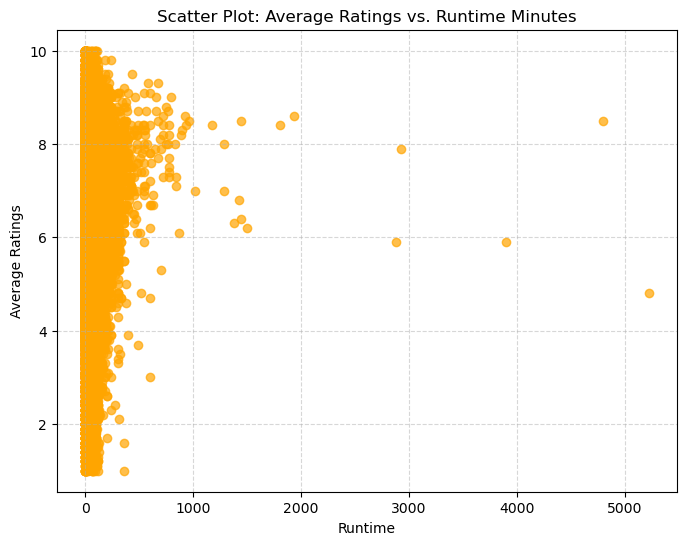

In [33]:
Runtimemin = unique_df['runtimeMinutes'].apply(pd.to_numeric, errors='coerce').fillna(0)
plt.figure(figsize=(8, 6))
plt.scatter(Runtimemin, unique_df['averageRating'], color='orange', alpha=0.7)
plt.xlabel('Runtime')
plt.ylabel('Average Ratings')
plt.title('Scatter Plot: Average Ratings vs. Runtime Minutes')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()